<div dir="rtl">
    <h1>تجهيز البيانات وتنظيفها</h1>
    <p>في هذه الخطوة، سيتم تحميل البيانات من الملف (Excel أو CSV)، تنظيفها وإعدادها للتحليل. يتضمن ذلك إزالة القيم المفقودة، ترميز المتغيرات الفئوية (مثل الجنس والعمر)، وضمان أن البيانات صالحة للاستخدام في التحليل الإحصائي. الهدف من هذه الخطوة هو التأكد من أن البيانات في شكل مناسب للتحليل من حيث الوضوح والدقة</p>
</div>

# Packages we will use  
- pandas 
- matplotlib
- seaborn
- statsmodels
- scipy
- openpyxl

In [6]:
# -------------------------------------------
# استيراد المكتبات اللازمة
# -------------------------------------------
import pandas as pd

# -------------------------------------------
# تحميل البيانات من ملف Excel
# -------------------------------------------
file_path = 'Xiriirka ka dhaxeya baraha bulshada iyo amniga.xlsx'
data = pd.read_excel(file_path)

# -------------------------------------------
# إزالة الفراغات الزائدة من أسماء الأعمدة
# -------------------------------------------
data.columns = data.columns.str.strip()

# -------------------------------------------
# إزالة الأعمدة غير المهمة مثل "Timestamp" و "Email Address"
# -------------------------------------------
data_cleaned = data.drop(columns=["Timestamp", "Email Address"], errors='ignore')

# -------------------------------------------
# إزالة الأعمدة المكررة
# -------------------------------------------
data_cleaned = data_cleaned.loc[:, ~data_cleaned.columns.duplicated()]

# -------------------------------------------
# تعريف الخريطة العامة للتحويل
# -------------------------------------------
response_map = {
    'Waan ku raacsanahay': 1,
    'Ilaa xad ayaan ku raacsanahay': 0.5,
    'Kuma raacsani': 0
}

# -------------------------------------------
# تعريف التحويلات الخاصة بالأعمدة الفئوية
# -------------------------------------------
gender_map = {'Lab': 1, 'Dheddig': 0}
age_group_map = {
    'Ka yar 20 Sano': 1,
    '20 - 29 Sano': 2,
    '30 - 39 Sano': 3,
    '40 - 49 Sano': 4,
    'Ka weyn 50 Sano': 5
}
education_map = {
    'Dugsiga Sare': 1,
    'Dibloma': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctorate': 5
}

# -------------------------------------------
# تعريف الخريطة الخاصة بالمجال المهني
# -------------------------------------------
profession_map = {
    "Arday": 1,
    "Akademi (Qof ka shaqeya, kuna dhaxjira waxbarashada)": 2,
    "Amniga (ka shaqeya hay'adaha amniga)": 3,
    "Warbaahin": 4,
    "Business": 5,
    "Engineer": 6,
    "Xisaabiye": 7,
    "Electrician": 8,
    "Shaqaale dowladeed": 9,
    "Shaqaale shirkadeed": 10,
    "Eastman machine operator": 11,
    "IT": 12,
    "Guri joog": 13,
    "Material": 14,
    "Hay’adaha Caalamiga ah": 15,
    "Howlo ii gaar ah": 16,
    "Civil servant": 17
}

# -------------------------------------------
# تعريف التحويلات الخاصة بسنوات الخبرة وساعات الاستخدام
# -------------------------------------------
experience_map = {
    'Ka yar 1 sano': 1,
    '1–3 sano': 2,
    '4–6 sano': 3,
    'Ka badan 6 sano': 4
}

social_media_hours_map = {
    'Ka yar 1 saac': 1,
    '1–3 saacadood': 2,
    '4–6 saacadood': 3,
    'Ka badan 6 saacadood': 4
}

# -------------------------------------------
# دالة لمطابقة النصوص والتأكد من أن جميع القيم تتم معالجتها
# -------------------------------------------
def clean_profession(val):
    # إذا كانت القيمة مفقودة، نقوم بإرجاع "Arday" بشكل افتراضي
    if pd.isna(val):
        return profession_map["Arday"]  # في حال كانت القيمة مفقودة نرجعها "Arday"
    
    s = val.strip().lower()  # تحويل النص إلى حرف صغير لتسهيل المعالجة

    # فحص الكلمات الرئيسية مثل Engineer، Engineering، Amniga وغيرها
    if 'amniga' in s:
        return profession_map["Amniga (ka shaqeya hay'adaha amniga)"]
    elif 'warbaahin' in s:
        return profession_map["Warbaahin"]
    elif 'akademi' in s:
        return profession_map["Akademi (Qof ka shaqeya, kuna dhaxjira waxbarashada)"]
    elif 'engineer' in s:  # يتعامل مع التهجئات المختلفة مثل "Engineer" و "Engineering"
        return profession_map["Engineer"]
    elif 'electrician' in s:
        return profession_map["Electrician"]
    elif 'xisaabiye' in s:
        return profession_map["Xisaabiye"]
    elif 'business' in s:
        return profession_map["Business"]
    elif 'shaqaale' in s:
        return profession_map["Shaqaale dowladeed"]
    elif 'it' in s:
        return profession_map["IT"]
    else:
        return profession_map["Arday"]  # قيمة افتراضية إذا لم تجد أي تطابق

# -------------------------------------------
# تطبيق التحويلات على الأعمدة
# -------------------------------------------
for column in data_cleaned.columns:
    if data_cleaned[column].dtype == 'object':  # Check if the column contains strings/text
        # تطبيق التحويلات العامة باستخدام response_map للأعمدة التي تحتوي على الإجابات
        if column in response_map:
            data_cleaned[column] = data_cleaned[column].map(response_map)
            data_cleaned[column] = data_cleaned[column].fillna(0)  # ملء القيم المفقودة بالقيمة الافتراضية (0 لـ "Kuma raacsani")
        
        # تطبيق التحويلات الخاصة بالأعمدة الفئوية
        elif column == 'Jinsigaada ( الجنس )':
            data_cleaned[column] = data_cleaned[column].map(gender_map)
            data_cleaned[column] = data_cleaned[column].fillna(0)  # ملء القيم المفقودة بـ 0 (Dheddig)
        
        elif column == 'Da\'daada ( الفئة العمرية)':
            data_cleaned[column] = data_cleaned[column].map(age_group_map)
            data_cleaned[column] = data_cleaned[column].fillna(1)  # ملء القيم المفقودة بـ 1 (Ka yar 20 Sano)
        
        elif column == 'Heerka Waxbarasho ( المؤهل العلمي )':
            data_cleaned[column] = data_cleaned[column].map(education_map)
            data_cleaned[column] = data_cleaned[column].fillna(1)  # ملء القيم المفقودة بـ 1 (Dugsiga Sare)
        
        elif column == 'Xirfadda Shaqado ( المجال المهني )':
            data_cleaned[column] = data_cleaned[column].apply(clean_profession)
        
        elif column == 'Sanadaha Khibradeed aad uleedahay dhanka warbaahinta ama amniga ( عدد سنوات الخبرة في المجال الأمني أو الإعلامي )':
            data_cleaned[column] = data_cleaned[column].map(experience_map)
            data_cleaned[column] = data_cleaned[column].fillna(1)  # ملء القيم المفقودة بـ 1 (Ka yar 1 sano)
        
        elif column == 'Saacadaha Aad Maalin kasta Ku Qaatid Isticmaalka Baraha Bulshada ( عدد ساعات استخدام شبكات التواصل يوميًا )':
            data_cleaned[column] = data_cleaned[column].map(social_media_hours_map)
            data_cleaned[column] = data_cleaned[column].fillna(1)  # ملء القيم المفقودة بـ 1 (Ka yar 1 saac)

# -------------------------------------------
# تطبيق التحويلات على الأعمدة النصية
# -------------------------------------------
for column in data_cleaned.columns:
    if data_cleaned[column].dtype == 'object':  # Check if the column contains strings/text
        # تطبيق التحويل باستخدام response_map
        if column in response_map:
            data_cleaned[column] = data_cleaned[column].map(response_map)
            # ملء القيم المفقودة بالقيمة الافتراضية (0 لـ "Kuma raacsani")
            data_cleaned[column] = data_cleaned[column].fillna(0)
        
        # إذا كانت الحقول تحتوي على القيم مثل "Waan ku raacsanahay" أو "Kuma raacsani"
        elif data_cleaned[column].isin(response_map.keys()).any():
            # استخدام map لتحويل القيم بناءً على الخريطة
            data_cleaned[column] = data_cleaned[column].map(response_map)
            data_cleaned[column] = data_cleaned[column].fillna(0)  # ملء القيم المفقودة بـ 0

# -------------------------------------------
# حفظ البيانات بعد التحويل
# -------------------------------------------
output_path = "cleaned_data_transformed_with_special_columns_no_inplace.xlsx"
data_cleaned.to_excel(output_path, index=False)

output_path  # إرجاع مسار الملف المحفوظ


'cleaned_data_transformed_with_special_columns_no_inplace.xlsx'

<div dir="rtl">
    <h1>التحليل الوصفي</h1>
    <p>بعد تنظيف البيانات، سنقوم بحساب الإحصاءات الوصفية مثل المتوسطات والانحرافات المعيارية، وإنشاء الرسوم البيانية لعرض التوزيعات الديموغرافية مثل الجنس، العمر، والمستوى التعليمي</p>
    <p>

        الإجراءات:
حساب الإحصاءات الوصفية:

حساب المتوسط، الانحراف المعياري، الحد الأدنى، الحد الأقصى، و النسب المئوية (25%، 50%، 75%) للمتغيرات الرقمية.

إنشاء الرسوم البيانية:

رسم الرسوم البيانية الشريطية (Bar Charts) و الرسوم البيانية الدائرية (Pie Charts) لعرض التوزيعات للمتغيرات الفئوية مثل الجنس، الفئة العمرية، المستوى التعليمي.

رسم الهيستوجرامات (Histograms) للمتغيرات المستمرة مثل عدد ساعات استخدام وسائل التواصل الاجتماعي و سنوات الخبرة.

رسم مخططات الصندوق (Box Plots) للكشف عن القيم الشاذة وفهم توزيع بعض المتغيرات الرقمية.
    </p>
</div>

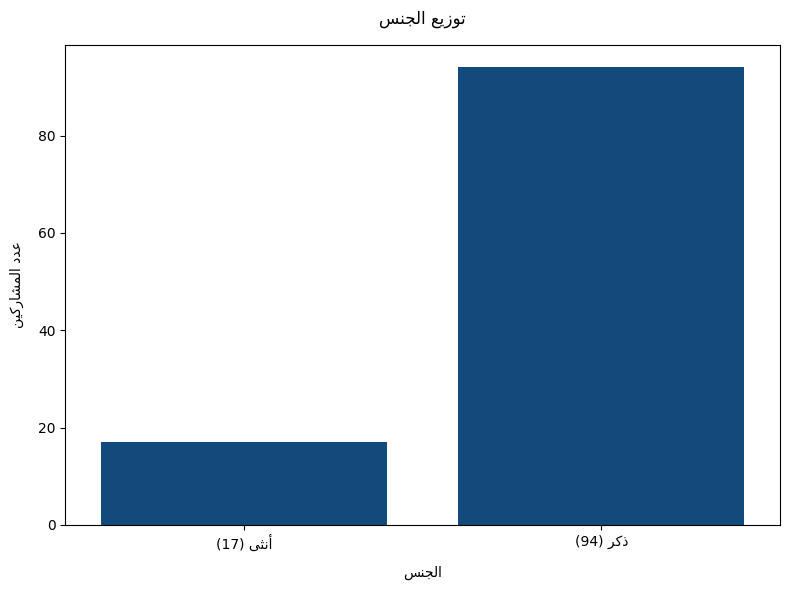

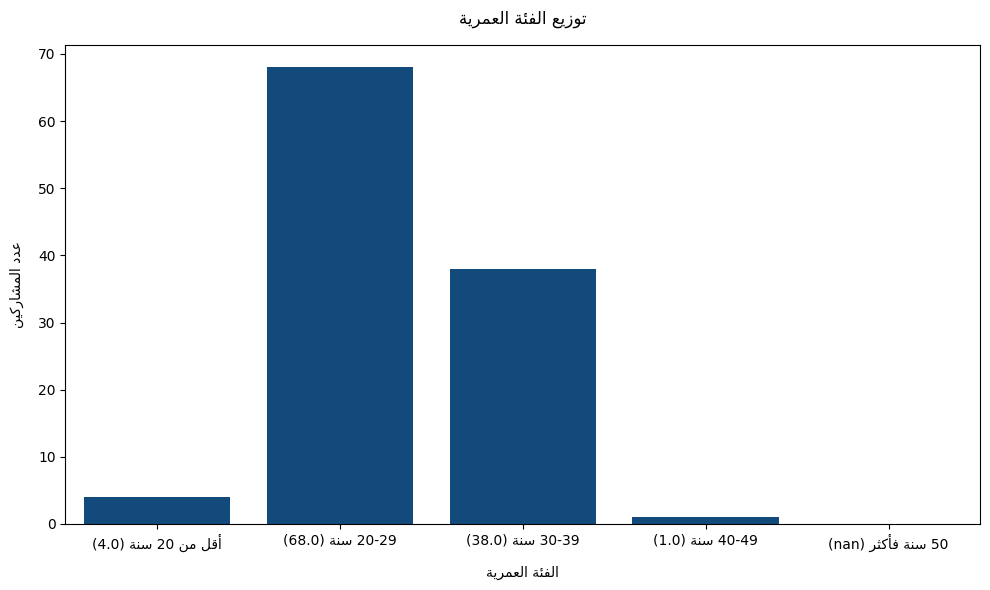

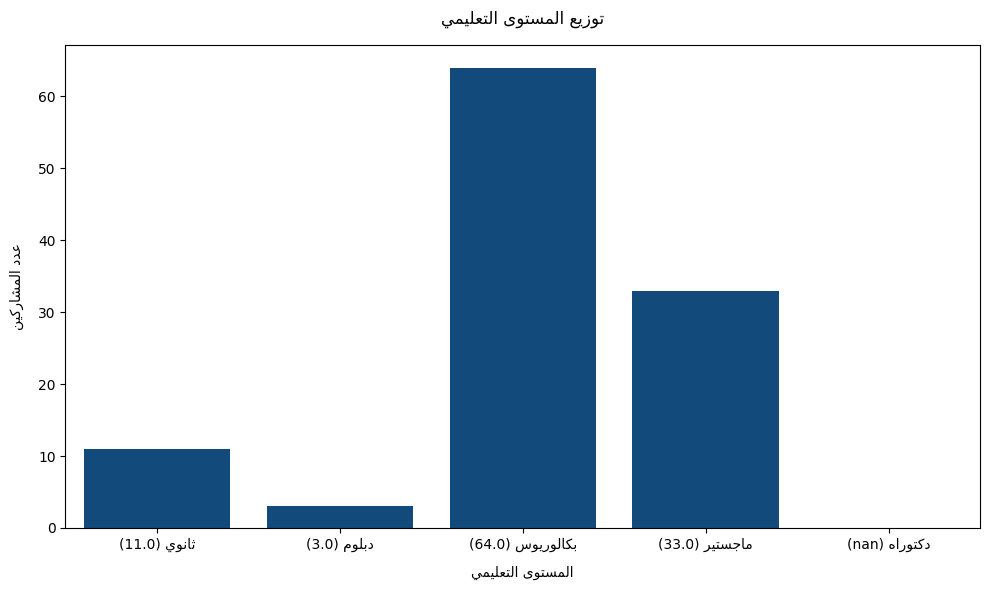

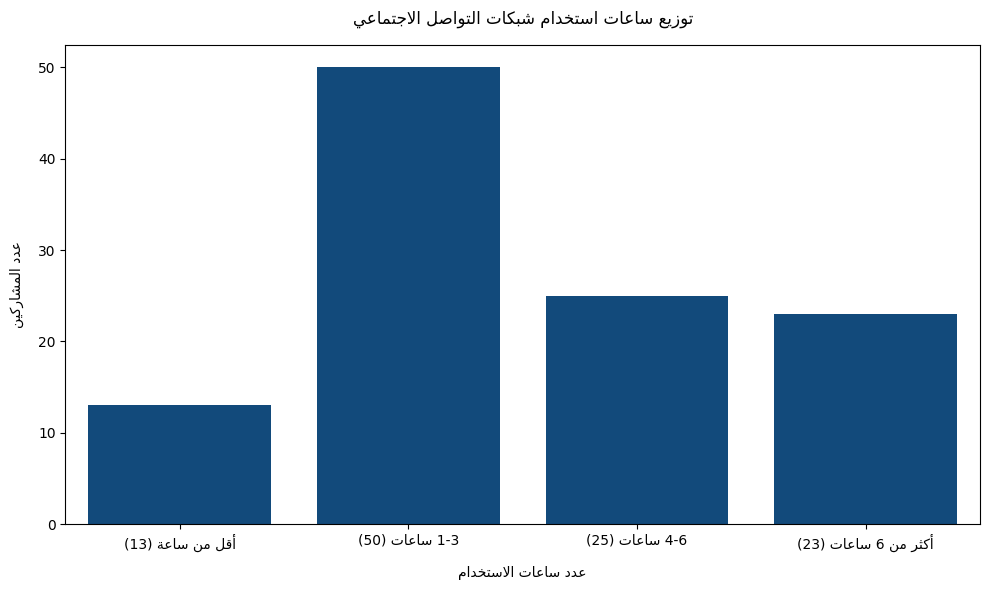

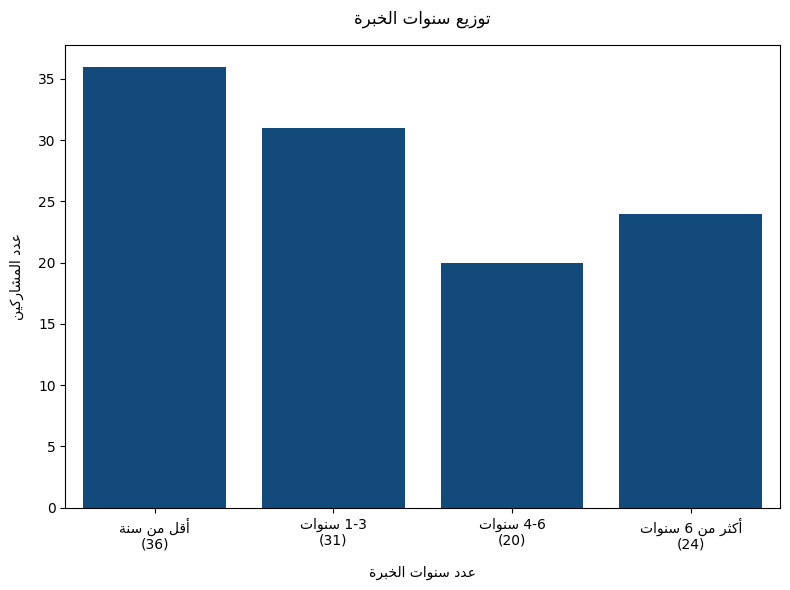

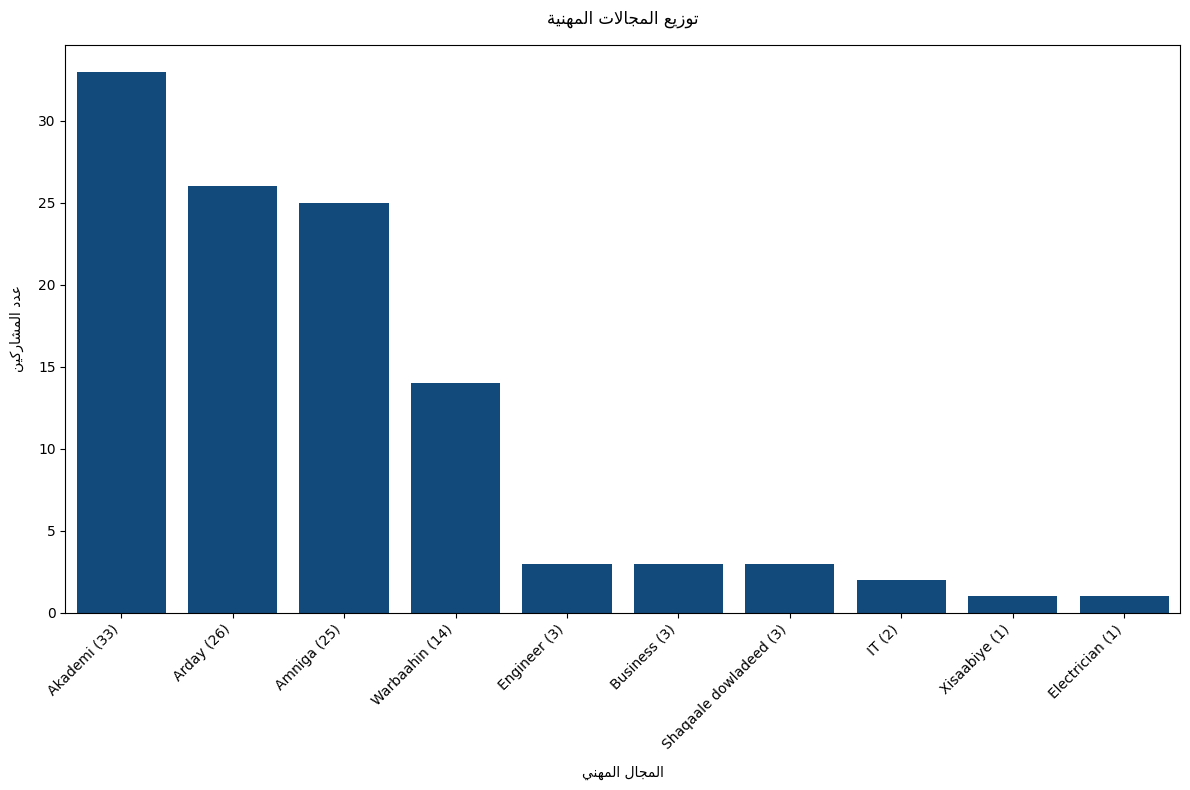

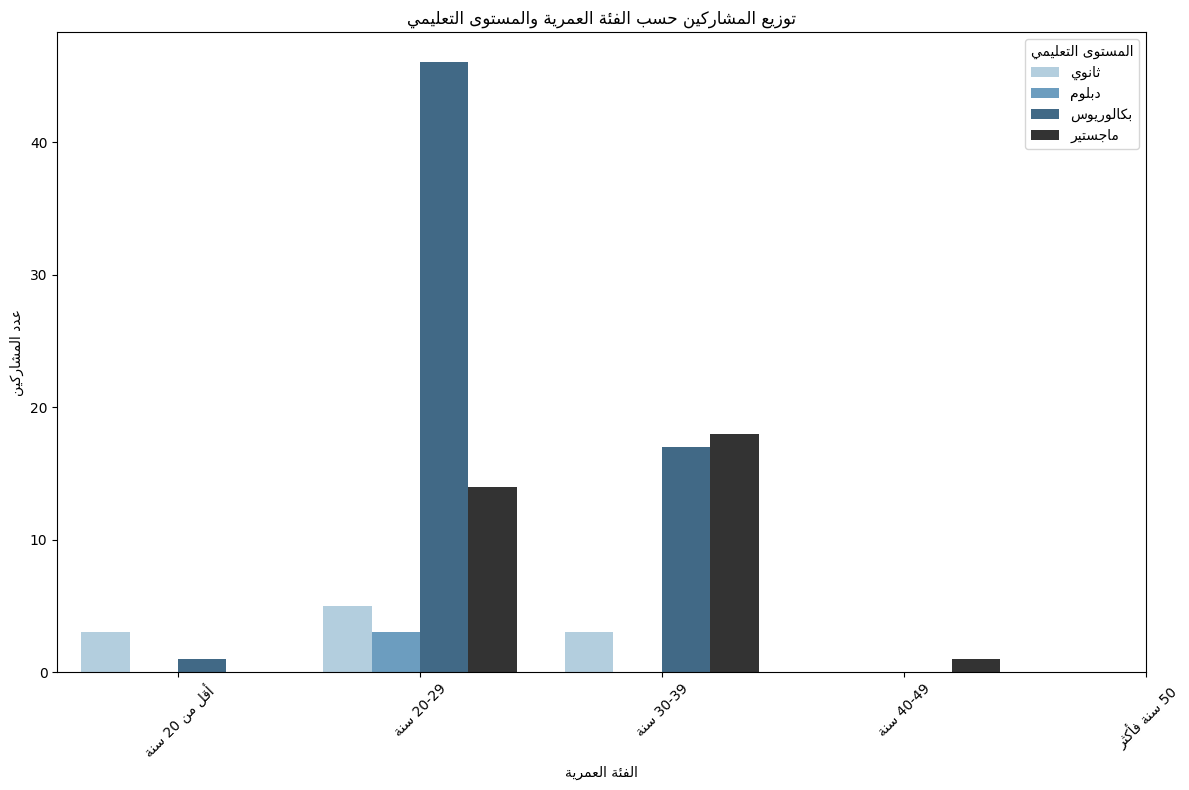

In [7]:
# ---------------------------------------------------
# استيراد المكتبات
# ---------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
import warnings
import plotly.express as px
import re

# كتم التحذيرات المتعلقة بالـ palette
warnings.filterwarnings("ignore", category=FutureWarning)

# دالة لإعادة تشكيل وعرض النص العربي
def arabic_title(title):
    reshaped_title = arabic_reshaper.reshape(title)
    return get_display(reshaped_title)

# ---------------------------------------------------
# 1) تحديد ألوان العلامة التجارية في قائمة
brand_colors = [
    "#004B8D",  # لون أساسي
    "#FFA500",  # لون ثانوي
    "#8A2BE2",  # لون مميز
    "#FFD700",  # لون تمييز
    "#DC143C",  # لون تحذير
]

# 2) جعل هذه القائمة هي الـ default palette لكل مخطط
sns.set_palette(sns.color_palette(brand_colors))

# ---------------------------------------------------
# 3) تعريف المهن (محتويات الـ profession_map)
profession_map = {
    "Arday": 1,
    "Akademi (Qof ka shaqeya, kuna dhaxjira waxbarashada)": 2,
    "Amniga (ka shaqeya hay'adaha amniga)": 3,
    "Warbaahin": 4,
    "Business": 5,
    "Engineer": 6,
    "Xisaabiye": 7,
    "Electrician": 8,
    "Shaqaale dowladeed": 9,
    "Shaqaale shirkadeed": 10,
    "Eastman machine operator": 11,
    "IT": 12,
    "Guri joog": 13,
    "Material": 14,
    "Hay’adaha Caalamiga ah": 15,
    "Howlo ii gaar ah": 16,
    "Civil servant": 17
}

# -------------------------------------------
# تعريف خريطة مهنية معكوسة لترجمة الأرقام إلى النصوص
# -------------------------------------------
inv_profession_map = {v: k for k, v in profession_map.items()}

# ---------------------------------------------------
# 4) رسم جميع المخططات بدون تمرير palette=
# ---------------------------------------------------

# مثال: توزيع الجنس
plt.figure(figsize=(8,6))
col = 'Jinsigaada ( الجنس )'
# نحدد القيم المتاحة للجنس فقط (ذكر وأنثى)
gender_map = {1: "ذكر", 0: "أنثى"}
order = [0, 1]  # ترتيب القيم في الجنس

ax = sns.countplot(x=col, data=data_cleaned, order=order)
ax.set_title(arabic_title("توزيع الجنس"), pad=15)
ax.set_xlabel(arabic_title("الجنس"), labelpad=10)
ax.set_ylabel(arabic_title("عدد المشاركين"), labelpad=10)

# إضافة العدد داخل تسمية الفئة
counts = data_cleaned[col].value_counts().reindex(order)
new_labels = [f"{gender_map[v]} ({counts[v]})" for v in order]
ax.set_xticks(range(len(order)))
ax.set_xticklabels([arabic_title(lbl) for lbl in new_labels], rotation=0)

plt.tight_layout()
plt.show()


# مثال: توزيع الفئة العمرية
plt.figure(figsize=(10,6))
col = "Da'daada ( الفئة العمرية)"
inv_age_map = {
    1: "أقل من 20 سنة",
    2: "20-29 سنة",
    3: "30-39 سنة",
    4: "40-49 سنة",
    5: "50 سنة فأكثر"
}
order = sorted(inv_age_map.keys())

ax = sns.countplot(x=col, data=data_cleaned, order=order)
ax.set_title(arabic_title("توزيع الفئة العمرية"), pad=15)
ax.set_xlabel(arabic_title("الفئة العمرية"), labelpad=10)
ax.set_ylabel(arabic_title("عدد المشاركين"), labelpad=10)

counts = data_cleaned[col].value_counts().reindex(order)
new_labels = [f"{inv_age_map[v]} ({counts[v]})" for v in order]
ax.set_xticks(range(len(order)))
ax.set_xticklabels([arabic_title(lbl) for lbl in new_labels], rotation=0)

plt.tight_layout()
plt.show()


# مثال: توزيع المستوى التعليمي
plt.figure(figsize=(10,6))
col = 'Heerka Waxbarasho ( المؤهل العلمي )'
inv_education_map = {
    1: "ثانوي", 2: "دبلوم", 3: "بكالوريوس", 4: "ماجستير", 5: "دكتوراه"
}
order = sorted(inv_education_map.keys())

ax = sns.countplot(x=col, data=data_cleaned, order=order)
ax.set_title(arabic_title("توزيع المستوى التعليمي"), pad=15)
ax.set_xlabel(arabic_title("المستوى التعليمي"), labelpad=10)
ax.set_ylabel(arabic_title("عدد المشاركين"), labelpad=10)

counts = data_cleaned[col].value_counts().reindex(order)
new_labels = [f"{inv_education_map[v]} ({counts[v]})" for v in order]
ax.set_xticks(range(len(order)))
ax.set_xticklabels([arabic_title(lbl) for lbl in new_labels], rotation=0)

plt.tight_layout()
plt.show()


# مثال: توزيع ساعات استخدام شبكات التواصل الاجتماعي
plt.figure(figsize=(10,6))
col = 'Saacadaha Aad Maalin kasta Ku Qaatid Isticmaalka Baraha Bulshada ( عدد ساعات استخدام شبكات التواصل يوميًا )'
inv_social_hours_map = {
    1: "أقل من ساعة", 2: "1-3 ساعات", 3: "4-6 ساعات", 4: "أكثر من 6 ساعات"
}
order = sorted(inv_social_hours_map.keys())

ax = sns.countplot(x=col, data=data_cleaned, order=order)
ax.set_title(arabic_title("توزيع ساعات استخدام شبكات التواصل الاجتماعي"), pad=15)
ax.set_xlabel(arabic_title("عدد ساعات الاستخدام"), labelpad=10)
ax.set_ylabel(arabic_title("عدد المشاركين"), labelpad=10)

counts = data_cleaned[col].value_counts().reindex(order)
new_labels = [f"{inv_social_hours_map[v]} ({counts[v]})" for v in order]
ax.set_xticks(range(len(order)))
ax.set_xticklabels([arabic_title(lbl) for lbl in new_labels], rotation=0)

plt.tight_layout()
plt.show()


# مثال: توزيع سنوات الخبرة
plt.figure(figsize=(8,6))
col = 'Sanadaha Khibradeed aad uleedahay dhanka warbaahinta ama amniga ( عدد سنوات الخبرة في المجال الأمني أو الإعلامي )'
inv_experience_map = {
    1: "أقل من سنة", 2: "1-3 سنوات", 3: "4-6 سنوات", 4: "أكثر من 6 سنوات"
}
order = sorted(inv_experience_map.keys())

ax = sns.countplot(x=col, data=data_cleaned, order=order)
ax.set_title(arabic_title("توزيع سنوات الخبرة"), pad=15)
ax.set_xlabel(arabic_title("عدد سنوات الخبرة"), labelpad=10)
ax.set_ylabel(arabic_title("عدد المشاركين"), labelpad=10)

counts = data_cleaned[col].value_counts().reindex(order)
new_labels = [f"{inv_experience_map[v]}\n({counts[v]})" for v in order]
ax.set_xticks(range(len(order)))
ax.set_xticklabels([arabic_title(lbl) for lbl in new_labels], rotation=0)

plt.tight_layout()
plt.show()


# مثال: توزيع المجالات المهنية مع إزالة القيم الفارغة وتحسين التسمية
plt.figure(figsize=(12, 8))

# تحديد العمود
col = 'Xirfadda Shaqado ( المجال المهني )'

# إزالة القيم الفارغة (NaN) من العمود
data_cleaned_non_null = data_cleaned[~data_cleaned[col].isna()]

# إعادة ترتيب الأعمدة بناءً على عدد المشاركين
profession_counts = data_cleaned_non_null[col].value_counts()

# رسم مخطط الأعمدة
ax = sns.countplot(x=col, data=data_cleaned_non_null, order=profession_counts.index)

# إضافة العنوان والتسميات
ax.set_title(arabic_title("توزيع المجالات المهنية"), pad=15)
ax.set_xlabel(arabic_title("المجال المهني"), labelpad=10)
ax.set_ylabel(arabic_title("عدد المشاركين"), labelpad=10)

# إزالة النص داخل الأقواس من التسميات
new_labels = [re.sub(r'\(.*\)', '', inv_profession_map[v]).strip() for v in profession_counts.index]

# إضافة العدد داخل التسميات
new_labels_with_count = [f"{label} ({profession_counts[v]})" for v, label in zip(profession_counts.index, new_labels)]

ax.set_xticks(range(len(profession_counts)))
ax.set_xticklabels([arabic_title(lbl) for lbl in new_labels_with_count], rotation=45, ha='right')

plt.tight_layout()
plt.show()


# رسم بياني مجمع لعدد المشاركين حسب مستوى التعليم والفئة العمرية
plt.figure(figsize=(12, 8))

# تحديد الأعمدة التي تحتوي على الفئات
sns.countplot(x="Da'daada ( الفئة العمرية)", hue="Heerka Waxbarasho ( المؤهل العلمي )", data=data_cleaned, palette="Blues_d")

# إضافة العناوين
plt.title(arabic_title("توزيع المشاركين حسب الفئة العمرية والمستوى التعليمي"))
plt.xlabel(arabic_title("الفئة العمرية"))
plt.ylabel(arabic_title("عدد المشاركين"))

# تخصيص الأسطورة لتوضيح معنى "المستوى التعليمي"
education_labels = {
    1: "ثانوي",
    2: "دبلوم",
    3: "بكالوريوس",
    4: "ماجستير"
}

# تخصيص الأسطورة مع القيم العربية للمستوى التعليمي
handles, labels = plt.gca().get_legend_handles_labels()
labels = [arabic_title(education_labels[int(label)]) for label in labels]
plt.legend(handles=handles, labels=labels, title=arabic_title("المستوى التعليمي"), loc='upper right', bbox_to_anchor=(1, 1))

# تخصيص التسميات الخاصة بالفئة العمرية على المحور السيني
age_labels = {
    1: "أقل من 20 سنة",
    2: "20-29 سنة",
    3: "30-39 سنة",
    4: "40-49 سنة",
    5: "50 سنة فأكثر"
}

# تغيير التسميات على المحور السيني
age_tick_labels = [age_labels.get(x, str(x)) for x in range(1, 6)]  # استخدام الفئات العمرية بدلاً من الأرقام

plt.xticks(ticks=range(5), labels=[arabic_title(lbl) for lbl in age_tick_labels], rotation=45)

plt.tight_layout()
plt.show()






<div dir="rtl">
    <h1>تحليل الارتباط (Correlation Analysis)</h1>
<b>الهدف:</b>
<p>تحليل العلاقة بين المحاور المختلفة لفهم مدى تأثير الشبكات الاجتماعية على تعزيز الأمن. سوف نقوم بتحليل الارتباط بين المحاور كما ذكرنا في الخطوات السابقة</p>

<b>
الخطوات:</b>
تحليل الارتباط بين المحاور المختلفة:

سنبدأ بتحليل العلاقة بين المحاور المختلفة مثل:

"تسهم شبكات التواصل في سرعة نقل المعلومات الأمنية" و "تساهم شبكات التواصل في الكشف المبكر عن الأحداث الأمنية".

"تسهم شبكات التواصل في نشر الوعي الأمني" و "تسهم في تحسين التواصل بين المواطنين والجهات الأمنية".

تحليل الارتباط بين المتغيرات الديموغرافية (الفئة العمرية، المستوى التعليمي، إلخ):

سنقوم بتحليل الارتباط بين المتغيرات الديموغرافية وإجابات المحاور المختلفة.

مثال: هل هناك علاقة بين الفئة العمرية و "تسهم شبكات التواصل في سرعة نقل المعلومات الأمنية"؟

حساب الارتباطات باستخدام pandas:

سنستخدم مصفوفة الارتباط (Correlation Matrix) لحساب الارتباط بين الأعمدة.

**تمثيل الارتباطات باستخدام خريطة حرارة (Heatmap) لتمثيل هذه الارتباطات بشكل مرئي باستخدام Seaborn.


    
</div>

,الوسيط,المتوسط,الانحراف
Baraha bulshada waxay ka qayb qaataan in si dhakhso (Degdeg) ah loo gaarsiiyo macluumaadka amniga ( تسهم شبكات التواصل في سرعة نقل المعلومات الأمنية ),1.000,0.820,0.300
Baraha Bulshada waxay ka suura galinayaan faafinta wacyigelinta ku saabsan halisaha amni ee suurto galka ah in ey dhacaan ( تساعد هذه الشبكات في نشر التوعية حول مخاطر محتملة ),1.000,0.838,0.295
Baraha bulshada waxay gacan ka geystaan in waqti hore la sii ogaado dhacdooyinka ammaanka - Khatarah amni - ( تساهم شبكات التواصل في الكشف المبكر عن الأحداث الأمنية),1.000,0.685,0.404
Baraha bulshada waxay xoojiyaan dareenka ammaan ee bulshada dhexdeeda ( تعزز وسائل التواصل من شعور الأفراد بالأمان المجتمعي ),1.000,0.743,0.356
Hay’adaha ammaanka waxay isticmaalaan baraha bulshada si ay ula socdaan dhaqdhaqaaqyada shakiga leh ( تستخدم الجهات الأمنية هذه الشبكات لرصد النشاطات المشبوهة ),1.000,0.721,0.367
Waxaa jira xiriir toos ah oo u dhexeeya isticmaalka baraha bulshada iyo kororka heerka ammaanka guud ee bulshada dhaxdeeda ( هناك علاقة طردية بين استخدام وسائل التواصل وارتفاع مستوى الأمن العام ),1.000,0.730,0.380
"Baraha bulshada waxay ka qayb qaataan hagaajinta heerka wada shaqeyn, ee u dhaxeysa shacabka iyo hay’adaha ammaanka (تسهم وسائل التواصل في تحسين التواصل بين المواطنين والجهات الأمنية)",1.000,0.707,0.402
Baraha bulshada waxay u sahlayaan dadka in si degdeg ah ay u soo wariyaan ama isku gaarsiinyaan macluumaadka laxariira falal dambiyeedka ama dhacdooyinka amni ee hareerahooda ka socda ( تمكن هذه الوسائل من الإبلاغ السريع عن الجرائم أو الحوادث ),1.000,0.815,0.308
Baraha bulshada waxay xoojiyaan dhaqanka wada-shaqeynta ee u dhexeeya muwaadiniinta iyo ciidanka ka shaqeya amniga ( تعزز شبكات التواصل ثقافة التعاون بين المواطن ورجل الأمن ),1.000,0.721,0.380
Baraha bulshada waxay door muhiim ah ka ciyaaraan istaraatiijiyadda amniga qaranka ( تمثل وسائل التواصل الاجتماعي عنصرًا مهمًا في استراتيجيات الأمن الوطني),1.000,0.617,0.431


,المتوسط,الانحراف,التباين
دور الأمان,0.740,0.215,0.046
الإيجابيات,0.716,0.250,0.062
المخاطر,0.821,0.190,0.036
الفوائد الأمنية,0.636,0.278,0.077


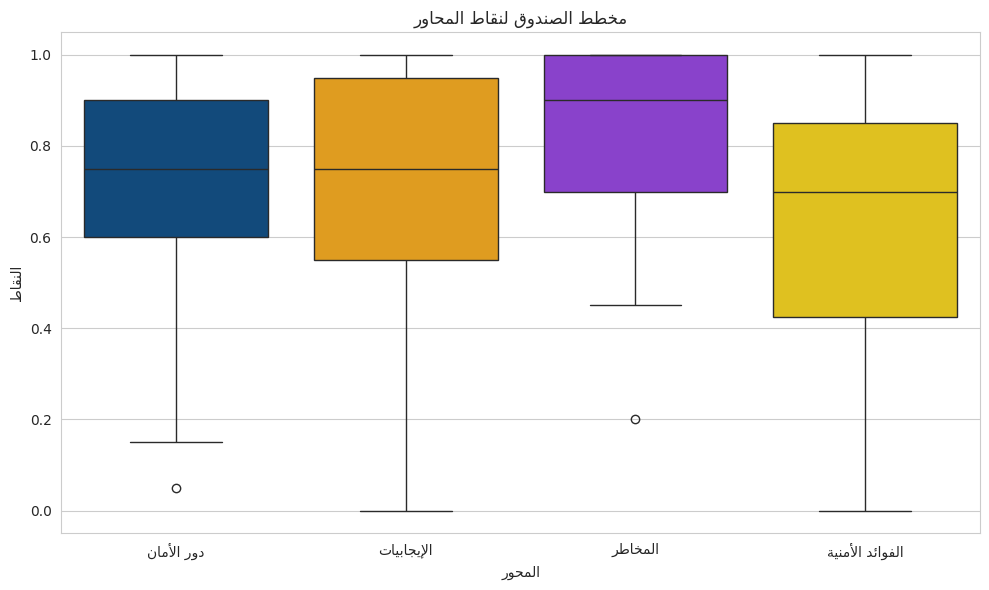

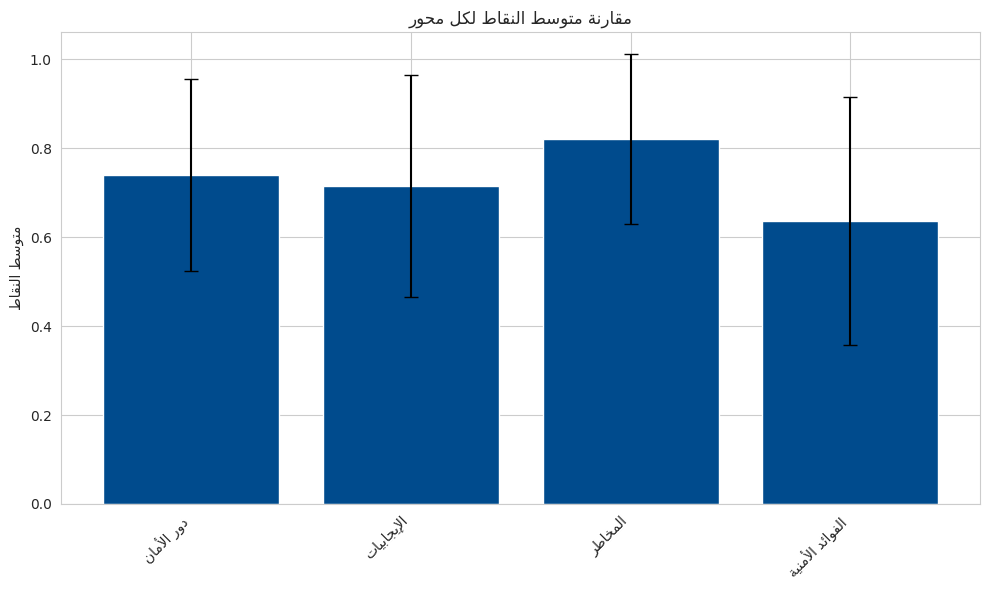

In [49]:
import matplotlib.pyplot as plt

import arabic_reshaper
from bidi.algorithm import get_display

# دالة لإعادة تشكيل وعرض النص العربي
def arabic_title(title):
    reshaped_title = arabic_reshaper.reshape(title)
    return get_display(reshaped_title)
    
# -------------------------------------------
#  حساب المتوسطات والانحرافات المعياري
# -------------------------------------------

# المحور الأول: "دور الشبكات في تعزيز الأمن"
security_columns = [
   "Baraha bulshada waxay ka qayb qaataan in si dhakhso (Degdeg) ah loo gaarsiiyo macluumaadka amniga ( تسهم شبكات التواصل في سرعة نقل المعلومات الأمنية )",
    "Baraha Bulshada waxay ka suura galinayaan faafinta wacyigelinta ku saabsan halisaha amni ee suurto galka ah in ey dhacaan ( تساعد هذه الشبكات في نشر التوعية حول مخاطر محتملة )",
    "Baraha bulshada waxay gacan ka geystaan in waqti hore la sii ogaado dhacdooyinka ammaanka - Khatarah amni - ( تساهم شبكات التواصل في الكشف المبكر عن الأحداث الأمنية)",
    "Baraha bulshada waxay xoojiyaan dareenka ammaan ee bulshada dhexdeeda (  تعزز وسائل التواصل من شعور الأفراد بالأمان المجتمعي )",
    "Hay’adaha ammaanka waxay isticmaalaan baraha bulshada si ay ula socdaan dhaqdhaqaaqyada shakiga leh ( تستخدم الجهات الأمنية هذه الشبكات لرصد النشاطات المشبوهة )",
    "Waxaa jira xiriir toos ah oo u dhexeeya isticmaalka baraha bulshada iyo kororka heerka ammaanka guud ee bulshada dhaxdeeda  ( هناك علاقة طردية بين استخدام وسائل التواصل وارتفاع مستوى الأمن العام )",
    "Baraha bulshada waxay ka qayb qaataan hagaajinta heerka wada shaqeyn, ee u dhaxeysa shacabka iyo hay’adaha ammaanka (تسهم وسائل التواصل في تحسين التواصل بين المواطنين والجهات الأمنية)",
    "Baraha bulshada waxay u sahlayaan dadka in si degdeg ah ay u soo wariyaan ama isku gaarsiinyaan macluumaadka laxariira falal dambiyeedka ama dhacdooyinka amni ee hareerahooda ka socda ( تمكن هذه الوسائل من الإبلاغ السريع عن الجرائم أو الحوادث )",
    "Baraha bulshada waxay xoojiyaan dhaqanka wada-shaqeynta ee u dhexeeya muwaadiniinta iyo ciidanka ka shaqeya amniga ( تعزز شبكات التواصل ثقافة التعاون بين المواطن ورجل الأمن )",
    "Baraha bulshada waxay door muhiim ah ka ciyaaraan istaraatiijiyadda amniga qaranka ( تمثل وسائل التواصل الاجتماعي عنصرًا مهمًا في استراتيجيات الأمن الوطني)",
]


# -------------------------------------------
# المحور الثاني: "الجوانب الإيجابية لاستخدام وسائل التواصل الاجتماعي"
positives_columns = [
    "Baraha bulshada waxay bixiyaan Hab wax ku ool ah oo wacyigelin amni lagu faafiyo ( توفر وسائل التواصل قناة فعالة لنشر الوعي الأمني )",
    "Baraha bulshada waxay sare uqaadaan dadaallada iskaa wax u qabso ee bulshada ee la xiriira ammaanka (تسهم في دعم مبادرات الأمن المجتمعي التطوعية)",
    "Baraha Bulshada waxay fududeeyaan gaarsiinta farriimaha wacyigelinta ah ee  ku socda qeybaha kala duwan ee bulshada ( تسهل وصول الرسائل التوعوية للفئات المختلفة من المجتمع)",
    "Baraha Bulshada waxay xoojiyaan kalsoonida u dhaxaysa hay’adaha ammaanka iyo bulshada ( تعزز الثقة بين الجهات الأمنية والمواطنين )",
    "Baraha Bulshada waxay u sare uqaadaan sumcadda  hay'adaha amniga ka shaqeya (تسهم في تحسين صورة الجهات الأمنية أمام المجتمع)",
    "Baraha Bulshada waxay fursad siinayaan muwdiniinta in ay qeyb ka noqdaa ka hortagga falal dambiyeedyada (تتيح مشاركة الأفراد في التصدي للظواهر الإجرامية)",
    "Baraha Bulshada waxay kordhiyaan heerka ka-qaybgalka bulshada ee arrimaha ammaanka - ka hortagga falalka lidka ku aha amniga -  (ترفع مستوى التفاعل المجتمعي حول القضايا الأمنية)",
    "Baraha Bulshada waxay gacan ka geystaan dhimista waqtiga looga baahan yahay in xaaladaha degdega ah lagu falceliyo ( تساعد في تقليل الزمن المستغرق للاستجابة للطوارئ )",
    "Baraha Bulshada waxay kaalin mug leh ku leeyihiin sare uqaadista ololayaasha ka-hortagga dambiyada (تعزز من فعالية حملات الوقاية من الجرائم)",
    "Baraha Bulshada waxay fududeyaan falanqaynta xogaha si loo ogaado falalka keeni kara amni darro  (توفر أدوات لتحليل البيانات لرصد أنماط التهديد)",
]



# -------------------------------------------
# المحور الثالث: "المخاطر والتحديات الناتجة عن الاستخدام السلبي"
risks_columns = [
    "Baraha bulshada waxay fududeeyaan faafinta wararka beenta ah ( تساهم شبكات التواصل في نشر الشائعات بشكل واسع )",
    "Baraha bulshada waxaa si sahlan loogu isticmaalaa faafinta macluumaad marin-habaabinta ah ( يسهل استخدامها في الترويج للمعلومات المضللة)",
    "Baraha bulshada mararka qaar waxaa loo adeegsadaa abaabulka dhaqdhaqaaqyo sharci-darro ah ( تُستغل أحيانًا في تنظيم أنشطة غير مشروعة )",
    "Hay’adaha ammaanka qaarkood malahan istaraatiijiyad wax ku ool ah si loo la dagaalamo  wararka xunxun ama been abuurka ah ( تفتقر بعض الجهات الأمنية لاستراتيجيات فعالة لمواجهتها)",
    "Isticmaalka baraha bulshada wuxuu keenaa cabsi iyo welwel bulsho xilliyada xasaradaha ( تؤدي إلى إثارة الفزع والقلق عند الأزمات )",
    "Baraha bulshada waxaa loo adeegsadaa blackmail (Faro in laga haayo qof ama waxa ay dhalinyaradu uyaqaana qarxis) iyo in dadka lagu dhaco ( تُستخدم لأغراض الابتزاز أو الاحتيال الإلكتروني )",
    "Baraha Bulshada waxay gacan ka geystaan xadgudubka Xogaha qarsoodiga ah - Privacy - iyo faafinta xogta xasaasiga ah ( تسهم في اختراق الخصوصية وتسريب معلومات حساسة)",
    "Kooxaha xagjirka ah waxay si fudud iskula xiriiri karaan ayagoo isticmaalaya baraha bulshada ( تتيح للمجموعات المتطرفة التواصل بسهولة )",
    "Baraha Bulshada mararka qaar waxay abuuran jahawareer, xasilloni darro iyo fikrad khaldan oo bulshada dhexdeeda ah ( تؤدي أحيانًا إلى تضليل الرأي العام )",
    "Wararka been abuurka ah waxay dhaawacaan kalsoonida shacabka ay ku qabaan hay’adaha rasmiga ah (تسهم في تدهور الثقة بالمؤسسات الرسمية بسبب تداول أخبار كاذبة)",
]

# -------------------------------------------
# المحور الرابع: "الاستفادة الأمنية من وسائل التواصل الاجتماعي"
security_benefit_columns = [
     "Hay’adaha ammaanka waxay leeyihiin xisaabaad - accounts -  firfircoon oo baraha bulshada ( لدى الجهات الأمنية حسابات نشطة على شبكات التواصل )",
    "Baraha Bulshada waxaa lagu faafiyaa ogeysiisyo iyo digniino amni si joogto ah ( يتم نشر إعلانات وتحذيرات أمنية دورية عبر هذه الوسائل )",
    "Waxaa jira is-dhexgal dhab ah oo u dhexeeya muwaadiniinta iyo hay’adaha amniga ayadoo la'adeegsanaayo baraha bulshada ( هناك تفاعل حقيقي بين المواطنين والجهات عبر هذه المنصات )",
    "Hay’adaha ammaanka waxay adeegsadaan habab falanqayn dijital ah si ay u ula socdaan xogaha lagu faafinaayo baraha bulshada ( تستخدم الجهات الأمنية أدوات تحليل رقمية لمراقبة المحتوى)",
    "Baraha bulshada waxaa loo adeegsadaa ololaha wacyigelinta bulshada ee amniga ( تُوظف وسائل التواصل في حملات التوعية المجتمعية )",
    "Baraha bulshada waxay ka qayb qaataan maareynta xaaladaha degdega ah si hufan ( تسهم هذه الوسائل في إدارة الأزمات بكفاءة )",
    "Shaqaalaha amaanka ayaa lagu tababaray isticmaalka  baraha bulshada si wax ku'ool ah ( يتم تدريب الكوادر الأمنية على الاستخدام الآمن )",
    "Baraha bulshada waxaa loo adeegsadaa raadraaca & daba galka dambiilayaasha si elektaroonig ah ( تُستخدم شبكات التواصل في تعقب المجرمين إلكترونيًا )",
    "Istaraatiijiyadaha ammaanka casriga ah waxay ku saleysan yihiin falanqaynta xogta baraha bulshada ( تستند استراتيجيات الأمن الحديثة إلى تحليل بيانات التواصل )",
    "Waxaa jira isku xirnaan iyo is la shaqeyn u dhaxeysa warbaahinta hore - Raadiyaha , TV-ga -  iyo baraha bulshada ( هناك تكامل بين وسائل الإعلام التقليدي ووسائل التواصل الحديثة )",
]


# -------------------------------------------
# ٢) تصفية الأعمدة الموجودة فعلياً في البيانات
# -------------------------------------------
security_cols  = [c for c in security_columns if c in data_cleaned.columns]
positives_cols = [c for c in positives_columns if c in data_cleaned.columns]
risks_cols     = [c for c in risks_columns if c in data_cleaned.columns]
benefit_cols   = [c for c in security_benefit_columns if c in data_cleaned.columns]

# -------------------------------------------
# ٣) حساب إحصاءات كل سؤال (الوسيط، المتوسط، الانحراف)
# -------------------------------------------
all_cols = security_cols + positives_cols + risks_cols + benefit_cols
question_stats = pd.DataFrame({
    'الوسيط':   data_cleaned[all_cols].median(),
    'المتوسط':  data_cleaned[all_cols].mean(),
    'الانحراف': data_cleaned[all_cols].std()
})

# -------------------------------------------
# ٤) حساب النقاط لكل محور
# -------------------------------------------
axis_scores = pd.DataFrame({
    'دور الأمان':     data_cleaned[security_cols].mean(axis=1),
    'الإيجابيات':     data_cleaned[positives_cols].mean(axis=1),
    'المخاطر':        data_cleaned[risks_cols].mean(axis=1),
    'الفوائد الأمنية': data_cleaned[benefit_cols].mean(axis=1),
})

axis_summary = pd.DataFrame({
    'المتوسط':    axis_scores.mean(),
    'الانحراف':   axis_scores.std(),
    'التباين':    axis_scores.var()
})

# -------------------------------------------
# ٥) إعداد تنسيقات الجدول بعرض كامل
# -------------------------------------------
table_style = [
    {'selector': 'table', 'props': [('width', '100%')]},
    {'selector': 'th',    'props': [('text-align', 'center')]},
    {'selector': 'td',    'props': [('text-align', 'center')]}
]

display(
    question_stats.style
        .set_table_attributes('style="width:100%;"')
        .set_caption("إحصاءات الأسئلة")
        .background_gradient(cmap='Blues')
        .format("{:.3f}")
        .set_table_styles(table_style)
)
display(
    axis_summary.style
        .set_table_attributes('style="width:100%;"')
        .set_caption("ملخص المحاور")
        .background_gradient(cmap='Greens')
        .format("{:.3f}")
        .set_table_styles(table_style)
)

# -------------------------------------------
# ٦) إعداد نمط الشبكة للأشكال
# -------------------------------------------
sns.set_style("whitegrid")

# -------------------------------------------
# ٧) مخطط الصندوق (Boxplot) لنقاط المحاور
# -------------------------------------------
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=axis_scores)
ax.set_xticks(range(len(axis_scores.columns)))
ax.set_xticklabels([arabic_title(col) for col in axis_scores.columns])
plt.title(arabic_title('مخطط الصندوق لنقاط المحاور'))
plt.xlabel(arabic_title('المحور'))
plt.ylabel(arabic_title('النقاط'))
plt.tight_layout()
plt.show()

# -------------------------------------------
# ٨) شريط المتوسطات مع أشرطة الخطأ (Error Bars)
# -------------------------------------------
plt.figure(figsize=(10,6))
labels = [arabic_title(idx) for idx in axis_summary.index]
x = range(len(labels))
plt.bar(x, axis_summary['المتوسط'], yerr=axis_summary['الانحراف'], capsize=5)
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
plt.title(arabic_title('مقارنة متوسط النقاط لكل محور'))
plt.ylabel(arabic_title('متوسط النقاط'))
plt.tight_layout()
plt.show()


اختبار الفرضيات إحصائياً
تحديد الفرضيات
لديك أربع فرضيات رئيسية (واحدة لكل محور). مثال وصياغة (بلغة بسيطة):

H1: هناك علاقة دالة إحصائياً بين “دور الشبكات في تعزيز الأمن” ومستوى الثقة العامة.

H2: هناك علاقة دالة إحصائياً بين “الجوانب الإيجابية” ومستوى التفاعل المجتمعي.

H3: هناك علاقة دالة إحصائياً بين “المخاطر” وزيادة الشعور بالقلق.

H4: هناك علاقة دالة إحصائياً بين “الاستفادة الأمنية” وتحسين سرعة الاستجابة للحوادث.

اختيار الاختبار المناسب

إذا المتغيران كميان مستمران (مثل نقاط المحورين)، نستخدم Pearson أو Spearman.

إذا تريدين تضمين متغيرات ضابطة (ديموغرافية)، يمكن بناء نموذج انحدار خطي بسيط أو متع

,الفرضية,المتغير أ,المتغير ب,Pearson r,Pearson p-value,Pearson دلالة إحصائية,Spearman ρ,Spearman p-value,Spearman دلالة إحصائية
0,H1,استخدام الجهات الأمنية لشبكات التواصل الاجتماعي,تعزيز الأمن العام,0.622,0.000,مؤثرة,0.576,0.000,مؤثرة
1,H2,الاستخدام السلبي لشبكات التواصل الاجتماعي,التحديات الأمنية,0.687,0.000,مؤثرة,0.675,0.000,مؤثرة
2,H3,التعاون بين المواطنين والجهات الأمنية,تحسين الاستجابة للأزمات الأمنية,0.786,0.000,مؤثرة,0.800,0.000,مؤثرة


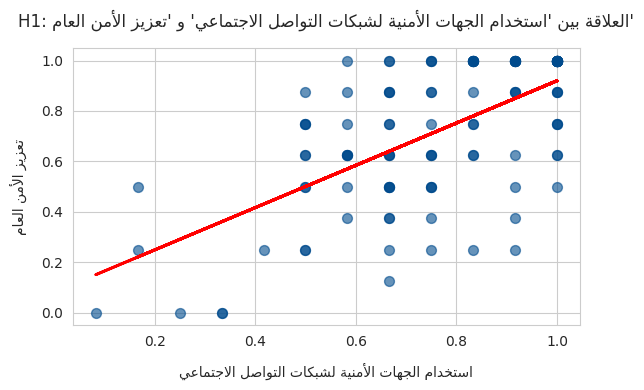

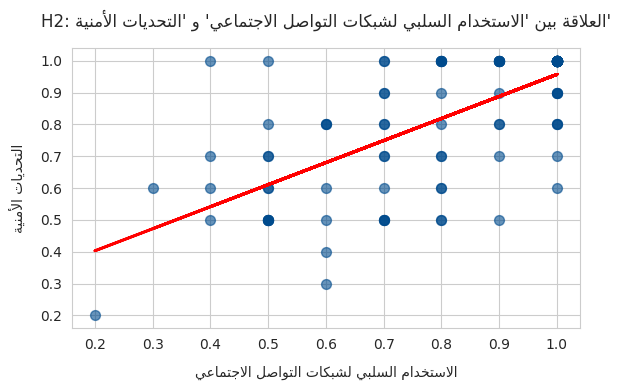

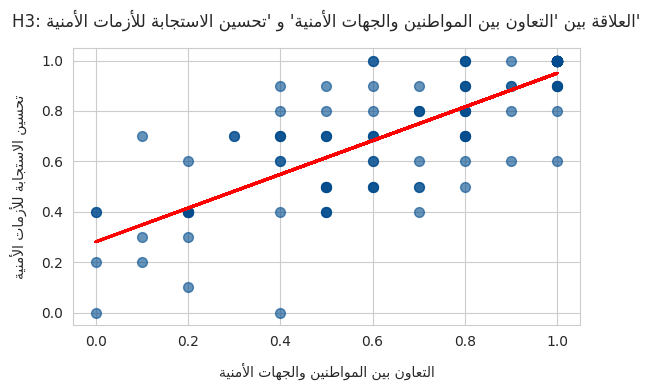

In [72]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from IPython.display import display

# دالة لإعادة تشكيل وعرض النص العربي
def arabic_title(text: str) -> str:
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# -------------------------------------------
# 1) تحميل البيانات المنظفة
# -------------------------------------------
data = pd.read_excel('cleaned_data_transformed_with_special_columns_no_inplace.xlsx')

# -------------------------------------------
# 2) قوائم الأعمدة لكل محور
# -------------------------------------------
# 1. security_cols (دور الشبكات في تعزيز الأمن):
security_cols = [
    "Baraha bulshada waxay ka qayb qaataan in si dhakhso (Degdeg) ah loo gaarsiiyo macluumaadka amniga ( تسهم شبكات التواصل في سرعة نقل المعلومات الأمنية )",
    "Baraha Bulshada waxay ka suura galinayaan faafinta wacyigelinta ku saabsan halisaha amni ee suurto galka ah in ey dhacaan ( تساعد هذه الشبكات في نشر التوعية حول مخاطر محتملة )",
    "Baraha bulshada waxay gacan ka geystaan in waqti hore la sii ogaado dhacdooyinka ammaanka - Khatarah amni - ( تساهم شبكات التواصل في الكشف المبكر عن الأحداث الأمنية)",
    "Baraha bulshada waxay xoojiyaan dareenka ammaan ee bulshada dhexdeeda (  تعزز وسائل التواصل من شعور الأفراد بالأمان المجتمعي )",
    "Hay’adaha ammaanka waxay isticmaalaan baraha bulshada si ay ula socdaan dhaqdhaqaaqyada shakiga leh ( تستخدم الجهات الأمنية هذه الشبكات لرصد النشاطات المشبوهة )",
    "Waxaa jira xiriir toos ah oo u dhexeeya isticmaalka baraha bulshada iyo kororka heerka ammaanka guud ee bulshada dhaxdeeda  ( هناك علاقة طردية بين استخدام وسائل التواصل وارتفاع مستوى الأمن العام )"
]
# 2. public_security_cols (تعزيز الأمن العام):
public_security_cols = [
    "Baraha bulshada waxay ka qayb qaataan hagaajinta heerka wada shaqeyn, ee u dhaxeysa shacabka iyo hay’adaha ammaanka (تسهم وسائل التواصل في تحسين التواصل بين المواطنين والجهات الأمنية)",
    "Baraha bulshada waxay u sahlayaan dadka in si degdeg ah ay u soo wariyaan ama isku gaarsiinyaan macluumaadka laxariira falal dambiyeedka ama dhacdooyinka amni ee hareerahooda ka socda ( تمكن هذه الوسائل من الإبلاغ السريع عن الجرائم أو الحوادث )",
    "Baraha bulshada waxay xoojiyaan dhaqanka wada-shaqeynta ee u dhexeeya muwaadiniinta iyo ciidanka ka shaqeya amniga ( تعزز شبكات التواصل ثقافة التعاون بين المواطن ورجل الأمن )",
    "Baraha bulshada waxay door muhiim ah ka ciyaaraan istaraatiijiyadda amniga qaranka ( تمثل وسائل التواصل الاجتماعي عنصرًا مهمًا في استراتيجيات الأمن الوطني)"
]
# 3. negative_use_cols (الاستخدام السلبي لشبكات التواصل الاجتماعي):
negative_use_cols = [
    "Baraha bulshada waxay fududeeyaan faafinta wararka beenta ah ( تساهم شبكات التواصل في نشر الشائعات بشكل واسع )",
    "Baraha bulshada waxaa si sahlan loogu isticmaalaa faafinta macluumaad marin-habaabinta ah ( يسهل استخدامها في الترويج للمعلومات المضللة)",
    "Baraha bulshada mararka qaar waxaa loo adeegsadaa abaabulka dhaqdhaqaaqyo sharci-darro ah ( تُستغل أحيانًا في تنظيم أنشطة غير مشروعة )",
    "Hay’adaha ammaanka qaarkood malahan istaraatiijiyad wax ku ool ah si loo la dagaalamo  wararka xunxun ama been abuurka ah ( تفتقر بعض الجهات الأمنية لاستراتيجيات فعالة لمواجهتها)",
    "Isticmaalka baraha bulshada wuxuu keenaa cabsi iyo welwel bulsho xilliyada xasaradaha ( تؤدي إلى إثارة الفزع والقلق عند الأزمات )"
]
# 4. security_challenges_cols (التحديات الأمنية):
security_challenges_cols = [
    "Baraha bulshada waxaa loo adeegsadaa blackmail (Faro in laga haayo qof ama waxa ay dhalinyaradu uyaqaana qarxis) iyo in dadka lagu dhaco ( تُستخدم لأغراض الابتزاز أو الاحتيال الإلكتروني )",
    "Baraha Bulshada waxay gacan ka geystaan xadgudubka Xogaha qarsoodiga ah - Privacy - iyo faafinta xogta xasaasiga ah ( تسهم في اختراق الخصوصية وتسريب معلومات حساسة)",
    "Kooxaha xagjirka ah waxay si fudud iskula xiriiri karaan ayagoo isticmaalaya baraha bulshada ( تتيح للمجموعات المتطرفة التواصل بسهولة )",
    "Baraha Bulshada mararka qaar waxay abuuran jahawareer, xasilloni darro iyo fikrad khaldan oo bulshada dhexdeeda ah ( تؤدي أحيانًا إلى تضليل الرأي العام )",
    "Wararka been abuurka ah waxay dhaawacaan kalsoonida shacabka ay ku qabaan hay’adaha rasmiga ah (تسهم في تدهور الثقة بالمؤسسات الرسمية بسبب تداول أخبار كاذبة)"
]
# 5. citizen_cooperation_cols (التعاون بين المواطنين والجهات الأمنية):
citizen_cooperation_cols = [
    "Baraha bulshada waxay bixiyaan Hab wax ku ool ah oo wacyigelin amni lagu faafiyo ( توفر وسائل التواصل قناة فعالة لنشر الوعي الأمني )",
     "Baraha bulshada waxay sare uqaadaan dadaallada iskaa wax u qabso ee bulshada ee la xiriira ammaanka (تسهم في دعم مبادرات الأمن المجتمعي التطوعية)",
    "Baraha Bulshada waxay xoojiyaan kalsoonida u dhaxaysa hay’adaha ammaanka iyo bulshada ( تعزز الثقة بين الجهات الأمنية والمواطنين )",
    "Baraha Bulshada waxay u sare uqaadaan sumcadda  hay'adaha amniga ka shaqeya (تسهم في تحسين صورة الجهات الأمنية أمام المجتمع)",
    "Baraha Bulshada waxay fursad siinayaan muwdiniinta in ay qeyb ka noqdaa ka hortagga falal dambiyeedyada (تتيح مشاركة الأفراد في التصدي للظواهر الإجرامية)"
]
# 
response_efficiency_cols = [
    "Baraha Bulshada waxay kordhiyaan heerka ka-qaybgalka bulshada ee arrimaha ammaanka - ka hortagga falalka lidka ku aha amniga -  (ترفع مستوى التفاعل المجتمعي حول القضايا الأمنية)",
    "Baraha Bulshada waxay gacan ka geystaan dhimista waqtiga looga baahan yahay in xaaladaha degdega ah lagu falceliyo ( تساعد في تقليل الزمن المستغرق للاستجابة للطوارئ )",
    "Baraha Bulshada waxay kaalin mug leh ku leeyihiin sare uqaadista ololayaasha ka-hortagga dambiyada (تعزز من فعالية حملات الوقاية من الجرائم)",
    "Baraha Bulshada waxay fududeyaan falanqaynta xogaha si loo ogaado falalka keeni kara amni darro  (توفر أدوات لتحليل البيانات لرصد أنماط التهديد)",
    "Baraha bulshada waxay sare uqaadaan dadaallada iskaa wax u qabso ee bulshada ee la xiriira ammaanka (تسهم في دعم مبادرات الأمن المجتمعي التطوعية)",
]


security_columns = [col.strip() for col in security_cols]
public_security_columns = [col.strip() for col in public_security_cols]
negative_use_columns = [col.strip() for col in negative_use_cols]
security_challenges_columns = [col.strip() for col in security_challenges_cols]
citizen_cooperation_columns = [col.strip() for col in citizen_cooperation_cols]
response_efficiency_columns = [col.strip() for col in response_efficiency_cols]

# -------------------------------------------
# 3) حساب متوسطات كل محور لكل مشارك
# -------------------------------------------
axis_scores = pd.DataFrame({
    'استخدام الجهات الأمنية لشبكات التواصل الاجتماعي': data[security_cols].mean(axis=1),
    'تعزيز الأمن العام': data[public_security_cols].mean(axis=1),
    'الاستخدام السلبي لشبكات التواصل الاجتماعي': data[negative_use_cols].mean(axis=1),
    'التحديات الأمنية': data[security_challenges_cols].mean(axis=1),
    'التعاون بين المواطنين والجهات الأمنية': data[citizen_cooperation_cols].mean(axis=1),
    'تحسين الاستجابة للأزمات الأمنية': data[response_efficiency_cols].mean(axis=1),
})

# -------------------------------------------
# 4) تعريف الفرضيات
# -------------------------------------------
tests = [
    ('H1', 'استخدام الجهات الأمنية لشبكات التواصل الاجتماعي', 'تعزيز الأمن العام'),
    ('H2', 'الاستخدام السلبي لشبكات التواصل الاجتماعي', 'التحديات الأمنية'),
    ('H3', 'التعاون بين المواطنين والجهات الأمنية', 'تحسين الاستجابة للأزمات الأمنية'),
]

# -------------------------------------------
# 5) إجراء اختبارات Pearson و Spearman مع حساب الدلالة الإحصائية
# -------------------------------------------
results = []
alpha = 0.05  # مستوى الدلالة

for name, A, B in tests:
    pear_r, pear_p = pearsonr(axis_scores[A], axis_scores[B])
    spear_r, spear_p = spearmanr(axis_scores[A], axis_scores[B])
    
    # حساب الدلالة الإحصائية (إذا كانت p-value أصغر من 0.05 نعتبر أن هناك علاقة دالة إحصائيًا)
    pear_significance = "مؤثرة" if pear_p < alpha else "غير مؤثرة"
    spear_significance = "مؤثرة" if spear_p < alpha else "غير مؤثرة"
    
    results.append({
        'الفرضية': name,
        'المتغير أ': A,
        'المتغير ب': B,
        'Pearson r': pear_r,
        'Pearson p-value': pear_p,
        'Pearson دلالة إحصائية': pear_significance,
        'Spearman ρ': spear_r,
        'Spearman p-value': spear_p,
        'Spearman دلالة إحصائية': spear_significance
    })

results_df = pd.DataFrame(results)

# -------------------------------------------
# 6) عرض جدول النتائج مع الدلالة الإحصائية
# -------------------------------------------
# Apply formatting only to numeric columns (Pearson r, p-value, Spearman ρ, p-value)
def format_numeric(value):
    if isinstance(value, (int, float)):
        return f"{value:.3f}"
    return value

results_df = results_df.applymap(format_numeric)

display(
    results_df.style
        .set_caption("نتائج اختبارات الارتباط للفرضيات")
)

# -------------------------------------------
# 7) رسم مخططات الانتشار مع خط الانحدار
# -------------------------------------------
for name, A, B in tests:
    plt.figure(figsize=(6, 4))
    plt.scatter(axis_scores[A], axis_scores[B], alpha=0.6, s=50)
    m, b = np.polyfit(axis_scores[A], axis_scores[B], 1)
    plt.plot(axis_scores[A], m*axis_scores[A] + b, 'r-', lw=2)
    
    plt.title(arabic_title(f"{name}: العلاقة بين '{A}' و '{B}'"), pad=15)
    plt.xlabel(arabic_title(A), labelpad=10)
    plt.ylabel(arabic_title(B), labelpad=10)
    plt.tight_layout()
    plt.show()


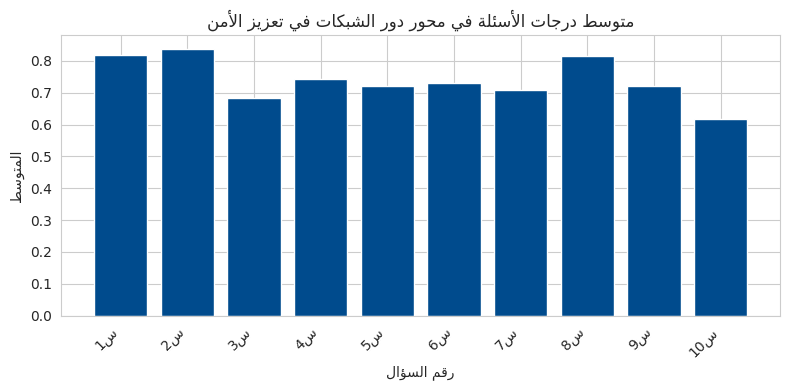

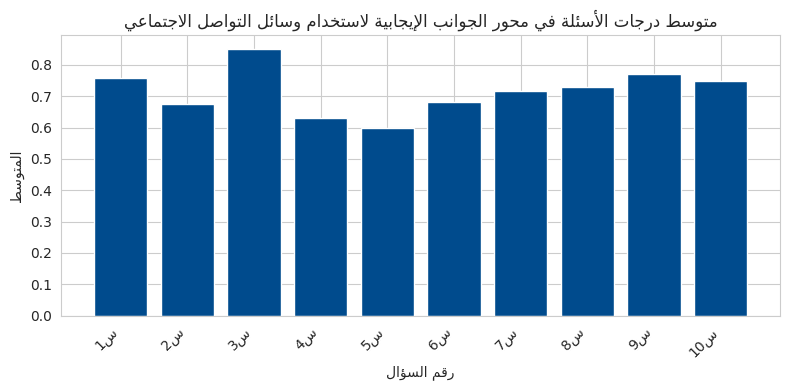

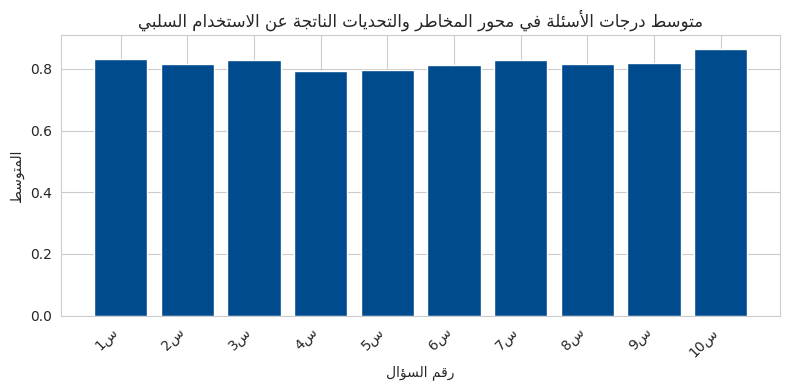

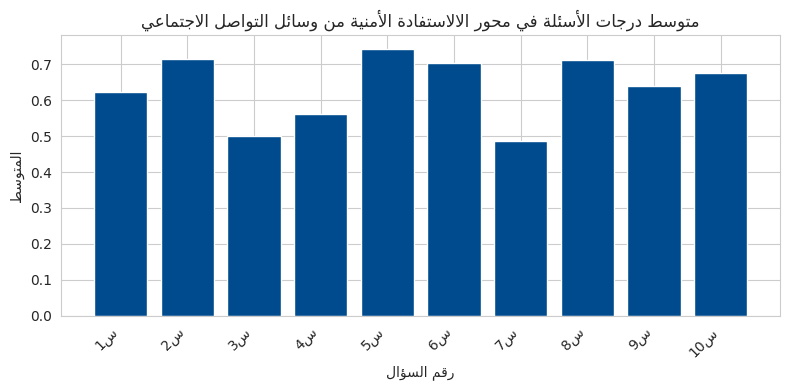

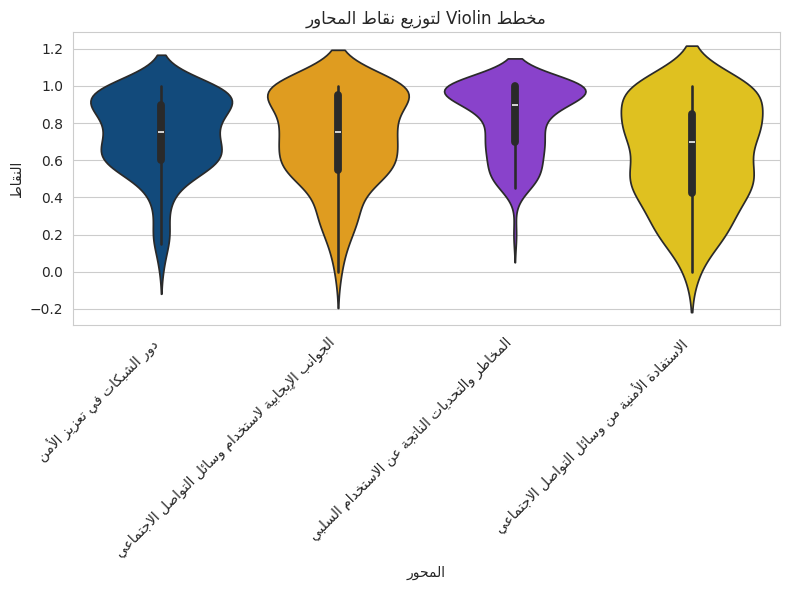

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# دالة لإعادة تشكيل وعرض النص العربي
def arabic_title(text: str) -> str:
    return get_display(arabic_reshaper.reshape(text))

# -------------------------------------------
# تحميل البيانات المنظفة
# -------------------------------------------
data = pd.read_excel('cleaned_data_transformed_with_special_columns_no_inplace.xlsx')

# -------------------------------------------
# قوائم الأعمدة لكل محور
# -------------------------------------------
security_cols  = [c for c in security_columns          if c in data.columns]
positives_cols = [c for c in positives_columns         if c in data.columns]
risks_cols     = [c for c in risks_columns             if c in data.columns]
benefit_cols   = [c for c in security_benefit_columns  if c in data.columns]

# -------------------------------------------
# حساب إحصاءات الفقرات والمحاور
# -------------------------------------------
all_cols = security_cols + positives_cols + risks_cols + benefit_cols
question_stats = pd.DataFrame({
    'Mean': data[all_cols].mean(),
    'Std':  data[all_cols].std()
})

axis_scores = pd.DataFrame({
    'دور الشبكات في تعزيز الأمن':                  data[security_cols].mean(axis=1),
    'الجوانب الإيجابية لاستخدام وسائل التواصل الاجتماعي': data[positives_cols].mean(axis=1),
    'المخاطر والتحديات الناتجة عن الاستخدام السلبي':        data[risks_cols].mean(axis=1),
    'الاستفادة الأمنية من وسائل التواصل الاجتماعي':        data[benefit_cols].mean(axis=1),
})

# -------------------------------------------
# Bar charts لمتوسطات الأسئلة في كل محور
# -------------------------------------------
axes_map = {
    'دور الشبكات في تعزيز الأمن': security_cols,
    'الجوانب الإيجابية لاستخدام وسائل التواصل الاجتماعي': positives_cols,
    'المخاطر والتحديات الناتجة عن الاستخدام السلبي': risks_cols,
    'الالاستفادة الأمنية من وسائل التواصل الاجتماعي': benefit_cols
}

for axis_name, cols in axes_map.items():
    means = question_stats.loc[cols, 'Mean']
    plt.figure(figsize=(8, 4))
    plt.bar(range(len(means)), means.values)
    plt.xticks(range(len(means)), [arabic_title(f"س{idx+1}") for idx in range(len(means))], rotation=45, ha='right')
    plt.title(arabic_title(f"متوسط درجات الأسئلة في محور {axis_name}"))
    plt.xlabel(arabic_title("رقم السؤال"))
    plt.ylabel(arabic_title("المتوسط"))
    plt.tight_layout()
    plt.show()

# -------------------------------------------
# Violin plot لتوزيع نقاط المحاور
# -------------------------------------------
plt.figure(figsize=(8, 6))
sns.violinplot(data=axis_scores)
plt.title(arabic_title("مخطط Violin لتوزيع نقاط المحاور"))
plt.xlabel(arabic_title("المحور"))
plt.ylabel(arabic_title("النقاط"))
plt.xticks(range(len(axis_scores.columns)), [arabic_title(col) for col in axis_scores.columns], rotation=45, ha='right')
plt.tight_layout()
plt.show()
